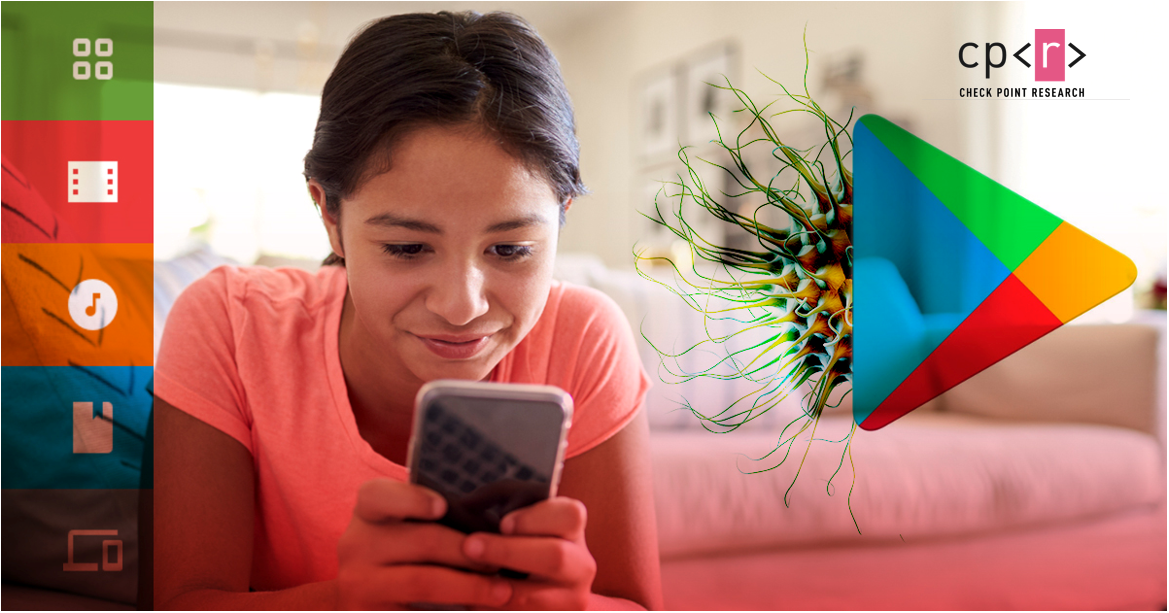


# GOGGLE PLAY STORE - EDA 



## Intoduction

In this kernal i'm going to do  EDA(Exploratory Data Analysis) on "Google play store Dataset" taken from kaggle, and see how rating of a particular app varies with differnent attributes. 
This project is totally based on EDA. That how we can manipulate data and use it for models.


##  Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import missingno as mn 
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')



## Importing  Dataset

In [2]:
df=pd.read_csv('googleplaystore.csv')

## Exploratory data analysis



In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

* App: Application name
* Category: Category the app belongs to
* Rating: Overall user rating of the app (as when scraped)
* Reviews: Number of user reviews for the app (as when scraped)
* Size: Size of the app (as when scraped)
* Installs: Number of user downloads/installs for the app (as when scraped)
* Type: Paid or Free
* Price: Price of the app (as when scraped)
* Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
* Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
* Last Updated: Date when the app was last updated on Play Store (as when scraped)
* Current Ver: Current version of the app available on Play Store (as when scraped)
* Android Ver: Min required Android version (as when scraped)

In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
#Checking missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


1. There are some missing values in Android version,Type and Content rating 
2. Rating has the highest missing value
3. we will fix this in feature Engineering. 

## Feature Engineering

Feature Engineering is the process of using domain knowledge of the data to create features that makes machine learning algo works.





* ###  Dealing with missing values

**Why missing values treatment is required?**

Missing Data in the traing set can reduce he power of a model of a model or can lead to a biased model because we have not analysed the behaviour and realtionship with oher variabkes correctly. it can lead to wrong prediciton .




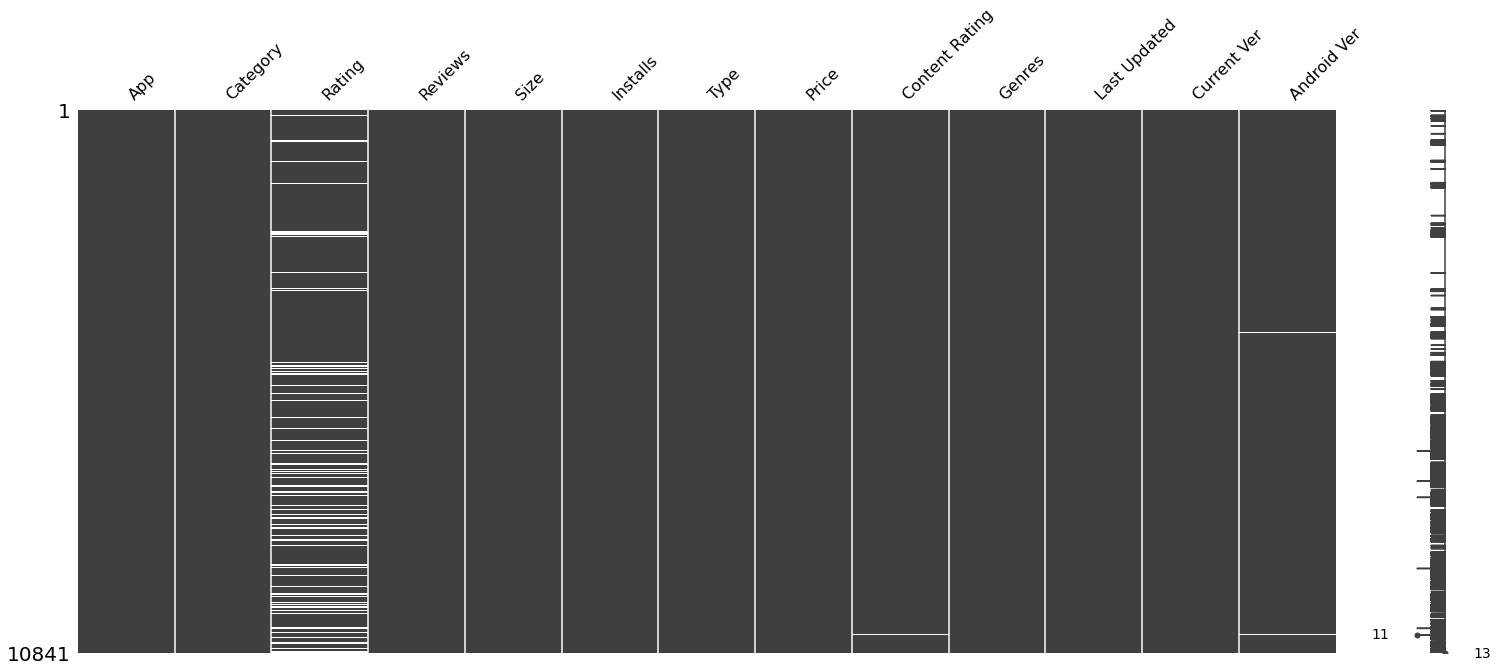

In [9]:
#Visualizing misisng values
mn.matrix(df)

**Dealing with content rating missing value**

In [10]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [11]:
#In content rating "Everyone" has the higest frequency as compared to others , so we can assume that 1 missing value is equal to Everyone.
df['Content Rating'].fillna("Everyone", inplace=True) 


**Dealing with Type**

In [12]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [13]:
df['Type'].fillna("Free", inplace=True) 

**Dealing with Rating**

I have taken the mean of the Rating column and filled the missing values with the mean value.

In [14]:
df['Rating'] = df["Rating"].fillna(value=df["Rating"].mean())
    

**Dealing with Android and Current version missing values**

I'm gonna drop these 2 columns as they are not that helpfull for model. So why wasting time in filling those  missing values.


* ###  Droping unnecessary features

In [15]:
df.drop(['Current Ver','Android Ver','App','Last Updated'],axis=1, inplace=True)

In [16]:
#New Dataset
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


## Now lets Explore Every feature one by one 

### 1.Rating:

In [17]:
df["Rating"].describe()

count    10841.000000
mean         4.193338
std          0.499557
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max         19.000000
Name: Rating, dtype: float64

**As we can see the max value of the Rating is 19, which is not possible ,cause Rating value  lies between (1 to 5)**

In [18]:
df[df['Rating'] == 19]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018"


**By viewing this we say that in this row all data are placed wrong by one position so we shift the data to the right hand size and make correct position.**

In [19]:
df.iloc[10472,0:] = df.iloc[10472,0:].shift(1)
df[10471:10473]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10471,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization
10472,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,Everyone


**Well, I'm gonna remove this row casue of Nan value,We can fill the Missing value by taking average, or if we knew the Name of the App we could have Fill its Category but sadily i have delected the App column, so ill just remove this row, *Atleast we learned how to Shift values ;)***

In [20]:
df.dropna(how ='any', inplace = True)

**Rating Distribution**

Text(0.5, 1.0, 'Distribution of Rating')

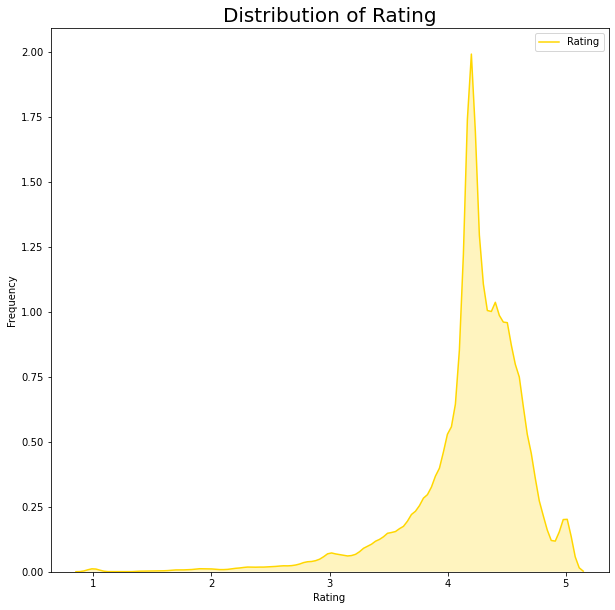

In [21]:
rcParams['figure.figsize'] = 10,10
g = sns.kdeplot(df.Rating, color="Gold", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)


**Average of rating of application in store is between 4 and 5**

## 2.Category

In [22]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

**Distribution Of Category**

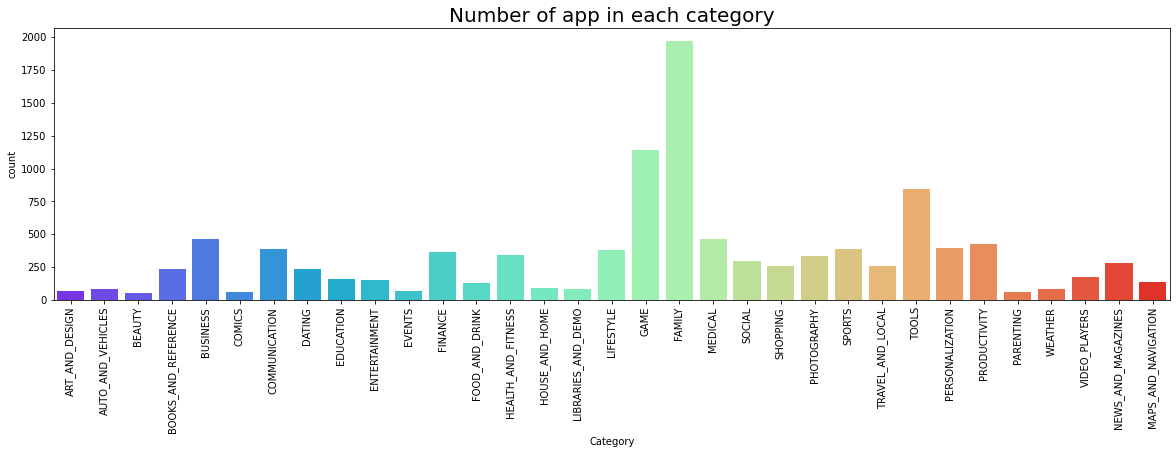

In [23]:
plt.figure(figsize=(20,5))
fig = sns.countplot(df['Category'], palette="rainbow")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.title('Number of app in each category',size = 20)
plt.show(fig)

**Game and Family category are the most appearances for application in store**

Text(0.5, 1.0, 'Rating VS Category')

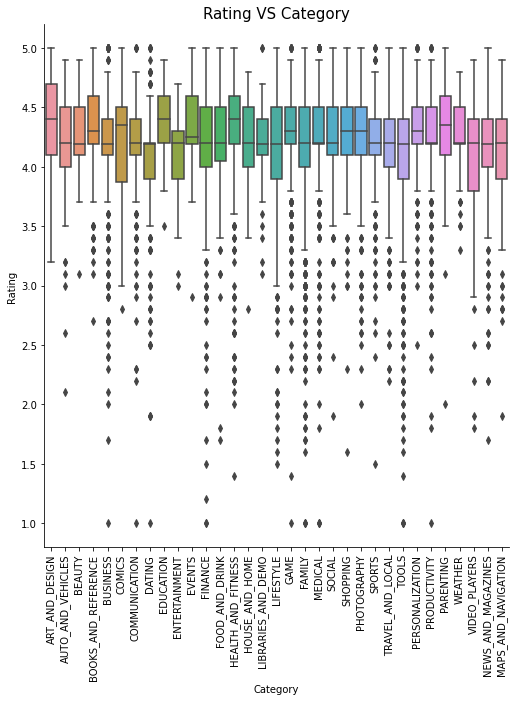

In [51]:
g = sns.catplot(x="Category",y="Rating",data=df, kind="box", height = 8)
g.set_xticklabels(rotation=90)
plt.title('Rating VS Category',size = 15)


## 3.Reviews

In [25]:
df["Reviews"].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

**1st convert object into int type**

In [26]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

**Distribuion of Reviews**

Text(0.5, 1.0, 'Distribution of Reviews')

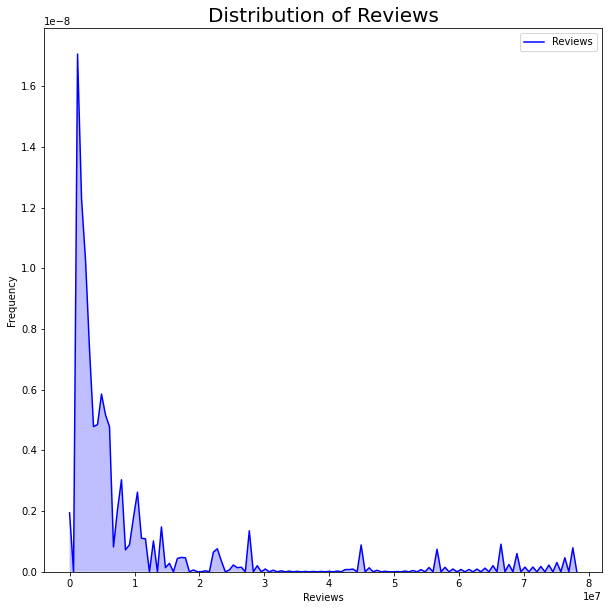

In [27]:
rcParams['figure.figsize'] = 10,10
g = sns.kdeplot(df.Reviews, color="Blue", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reviews',size = 20)

## 4.Size

In [28]:
df['Size'].describe()

count                  10840
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [29]:
df[df.Size == 'Varies with device']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
37,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design
42,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design
52,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles
67,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles
68,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles
...,...,...,...,...,...,...,...,...,...
10713,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather
10725,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation
10765,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social
10826,SOCIAL,4,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social


**Data still in object type, and contain the metric symbol for the perefix,
and special size which are "Varies with device" that we need to deal with it.**

*change it to NA first,I decide to fill "Varies with device" with mean of size in each category*

In [30]:
df['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [31]:
df['Size'].isnull().sum()

1695

In [32]:
df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [33]:
df['Size'] = df['Size'].fillna(value=df['Size'].mean())

**Rating vs Size**

Text(0.5, 1.0, 'Rating VS Size')

<Figure size 720x720 with 0 Axes>

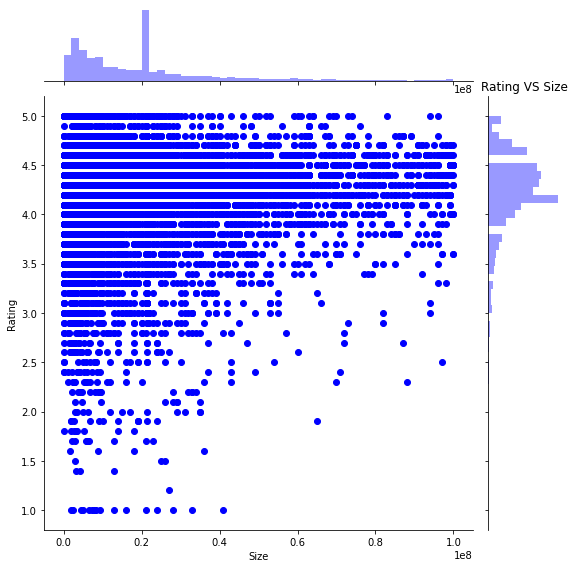

In [34]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'blue', data=df, size = 8);
plt.title('Rating VS Size')


## 5.Installs

In [35]:
df['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [36]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

**Cleaning of Installs**

In [37]:
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))


## 6.Type

In [38]:
df['Type'].describe()

count     10840
unique        2
top        Free
freq      10040
Name: Type, dtype: object

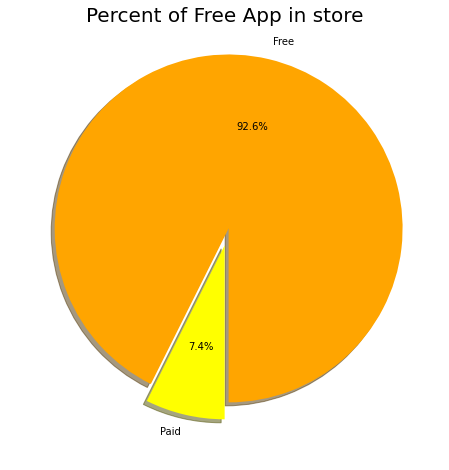

In [39]:
a =df['Type'].value_counts(sort = True).index
b= df['Type'].value_counts(sort = True)
rcParams['figure.figsize'] = 8,8
plt.pie(b, explode=(0.1,0), labels=a, colors=["orange","yellow"],
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

Text(0.5, 1.0, 'Rating vs Type')

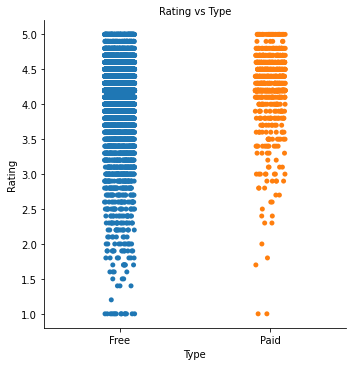

In [40]:
sns.catplot(x='Type',y="Rating",data=df)
plt.title('Rating vs Type',size=10)

## 7.Price

In [41]:
df["Price"].describe()

count     10840
unique       92
top           0
freq      10040
Name: Price, dtype: object

In [42]:
#Cleaning Price
df["Price"]=df["Price"].apply(lambda x:x.strip('$'))

## 8.Content Rating

In [43]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Rating VS Content Rating')

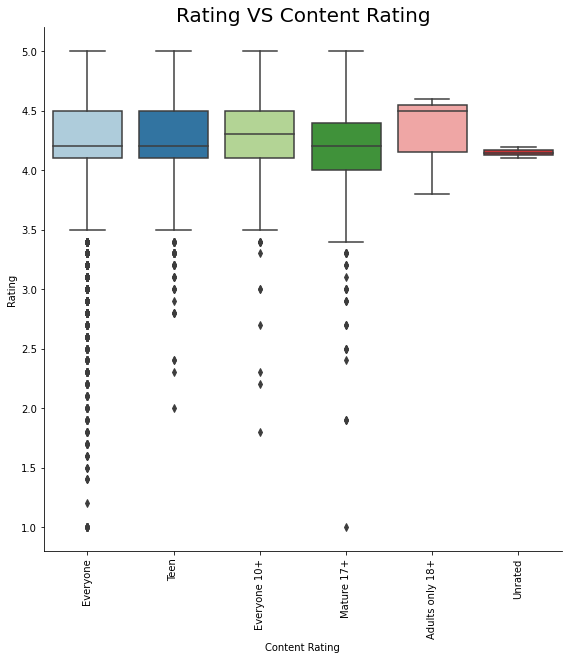

In [44]:
g =sns.catplot(x="Content Rating",y="Rating",data=df, kind="box", height = 8 ,palette = "Paired")
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Rating VS Content Rating',size = 20)

## 9.Genres

In [45]:
print( len(df['Genres'].unique()) , "genres")

print("\n", df['Genres'].unique())

119 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creati

In [46]:
df.Genres.value_counts().head(10)

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

In [47]:
df['Genres'] = df['Genres'].str.split(';').str[0]

**Many genre contain only few record, it may make a bias.
Then, I decide to group it to bigger genre by ignore sub-genre (after " ; " sign)**

In [48]:
print( len(df['Genres'].unique()) , "genres")

print("\n", df['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


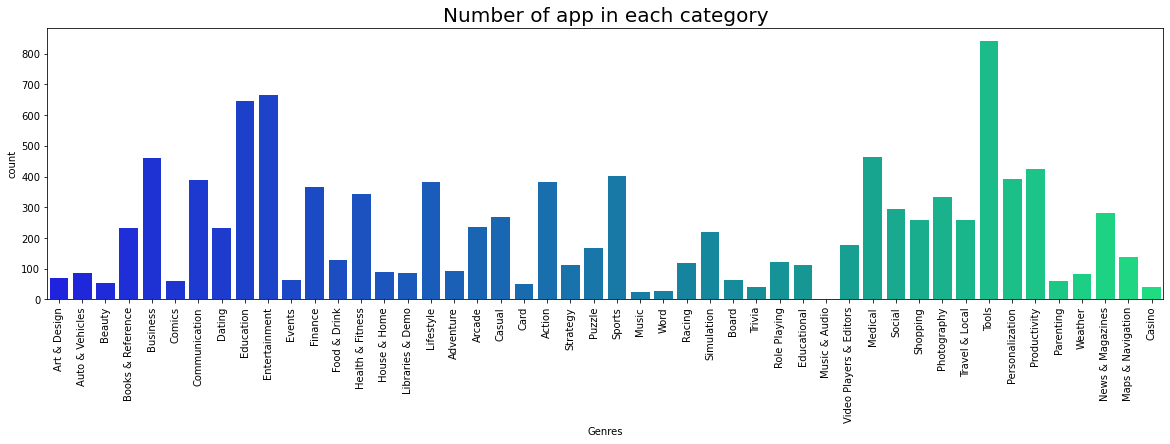

In [49]:
plt.figure(figsize=(20,5))
fig = sns.countplot(df['Genres'], palette="winter")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.title('Number of app in each category',size = 20)
plt.show(fig)

**This was my 1st EDA on any data, i have only taken those attribues which will be helpful for he model**